# Projektvorstellung "Music Recommendation" und Präsentation der ersten Ergebnisse

## Aufgabenstellung:

Music Recommendation
- By playing (=selecting) one (or multiple songs), recommend a list of songs users most likely would want to hear next.
-  Based on various spotify datasets:
    - https://research.atspotify.com/datasets/
    - https://developer.spotify.com/documentation/web-api/ – https://genius.com/
- Data:
    - List of songs, artists, album with track information – In addition Audio Features, Lyrics
    - Format:CSV
    - ~800 MB

## Gruppenmitglieder

Erlacher Felix
Taskaya Merve
Wlodarski Tomasz 

## Dokumentation

Die Dokumentation wurde in Github durchgeführt. https://github.com/merve017/spotify.git 

## Datenquellen

- CSV Format
- 5 datasets: Tracks, Artist, Album, Lyrics, Audio Features

## Datenanalyse

Aufgabenstellung lt. Folie 

Analyse:

▪ Vorstellung Daten-Analyse und EDA (z.b. Jupyter) – Ergebnisse der Recherche:
▪ Auswahlmöglichkeiten der Modelle soll präsentiert werden, mit kurzer Erläuterung, wie es zu der Entscheidung gekommen ist und woran es scheitern könnte.
▪ Ausgewählte Modelle fließen dann in Py5 Abgabe ein

In [1]:
# Used libraries 
import pandas as pd
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from collections import defaultdict

In [2]:
# read csv files
df_tracks = pd.read_csv('data/spotify_tracks.csv', sep=',')
df_artists = pd.read_csv('data/spotify_artists.csv', sep=',')
df_albums = pd.read_csv('data/spotify_albums.csv', sep=',')
df_lyrics = pd.read_csv('data/lyrics_features.csv', sep=',')
df_audio = pd.read_csv('data/low_level_audio_features.csv', sep=',')

In [24]:
# show first 5 rows
print(df_tracks.info())
df_tracks['id'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101939 entries, 0 to 101938
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         101939 non-null  int64  
 1   acousticness       101939 non-null  float64
 2   album_id           101939 non-null  object 
 3   analysis_url       101939 non-null  object 
 4   artists_id         101939 non-null  object 
 5   available_markets  101939 non-null  object 
 6   country            101939 non-null  object 
 7   danceability       101939 non-null  float64
 8   disc_number        101939 non-null  float64
 9   duration_ms        101939 non-null  float64
 10  energy             101939 non-null  float64
 11  href               101939 non-null  object 
 12  id                 101939 non-null  object 
 13  instrumentalness   101939 non-null  float64
 14  key                101939 non-null  float64
 15  liveness           101939 non-null  float64
 16  lo

0    5qljLQuKnNJf4F4vfxQB0V
1    3VAX2MJdmdqARLSU5hPMpm
2    1L3YAhsEMrGVvCgDXj2TYn
3    6aCe9zzoZmCojX7bbgKKtf
4    1Vo802A38tPFHmje1h91um
Name: id, dtype: object

In [14]:
# show first 5 rows
print(df_albums.info())
df_albums.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75511 entries, 0 to 75510
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              75511 non-null  int64 
 1   album_type              75511 non-null  object
 2   artist_id               75511 non-null  object
 3   available_markets       75511 non-null  object
 4   external_urls           75511 non-null  object
 5   href                    75511 non-null  object
 6   id                      75511 non-null  object
 7   images                  75511 non-null  object
 8   name                    75511 non-null  object
 9   release_date            75511 non-null  object
 10  release_date_precision  75511 non-null  object
 11  total_tracks            75511 non-null  int64 
 12  track_id                75511 non-null  object
 13  track_name_prev         75511 non-null  object
 14  uri                     75511 non-null  object
 15  ty

,Unnamed: 0,album_type,artist_id,available_markets,external_urls,href,id,images,name,release_date,release_date_precision,total_tracks,track_id,track_name_prev,uri,type
0,0,single,3DiDSECUqqY1AuBP8qtaIa,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/1g...,https://api.spotify.com/v1/albums/1gAM7M4rBwEb...,1gAM7M4rBwEbSPeAQR2nx1,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",If I Ain't Got You EP,2019-02-08,day,6,2iejTMy9XZ8Gaae0aQ2yl0,track_32,spotify:album:1gAM7M4rBwEbSPeAQR2nx1,album
1,1,album,6s1pCNXcbdtQJlsnM1hRIA,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/4K...,https://api.spotify.com/v1/albums/4KfJZV7WfolY...,4KfJZV7WfolYlxBzOTo66s,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Shostakovich Symphony No.5 - Four Romances on ...,2019-03-01,day,8,1WQfghEjszJJ4H8MAWrQ2C,track_11,spotify:album:4KfJZV7WfolYlxBzOTo66s,album
2,2,single,5YjfNaHq05WrwldRe1QSBc,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/7n...,https://api.spotify.com/v1/albums/7nLYY7uAVUb5...,7nLYY7uAVUb57kpd7tZxnS,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Take My Bass,2019-03-14,day,1,3jJKj4QTK3v18ZSwpk7AcV,track_15,spotify:album:7nLYY7uAVUb57kpd7tZxnS,album
3,3,single,2G9Vc16JCpnZmK4uGH46Fa,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/6p...,https://api.spotify.com/v1/albums/6p20Rt4x2Qn5...,6p20Rt4x2Qn5mUMRi1s6pj,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Hypnotizing (Are U),2016-11-16,day,1,1xGtDafUZbHyYC3Xarcbrj,track_46,spotify:album:6p20Rt4x2Qn5mUMRi1s6pj,album
4,4,single,2dwM9OcE4c3Ph1UBINSodx,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/1X...,https://api.spotify.com/v1/albums/1XeoOqC1q7U2...,1XeoOqC1q7U2iyLEQJ64cu,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Sunshine,2018-07-20,day,1,0gWtsXvXOzAT6FtM3ur8in,track_10,spotify:album:1XeoOqC1q7U2iyLEQJ64cu,album


In [9]:
# show first 5 rows
print(df_artists.info())
df_artists.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56129 entries, 0 to 56128
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         56129 non-null  int64 
 1   artist_popularity  56129 non-null  int64 
 2   followers          56129 non-null  int64 
 3   genres             56129 non-null  object
 4   id                 56129 non-null  object
 5   name               56128 non-null  object
 6   track_id           56129 non-null  object
 7   track_name_prev    56129 non-null  object
 8   type               56129 non-null  object
dtypes: int64(3), object(6)
memory usage: 3.9+ MB
None


,Unnamed: 0,artist_popularity,followers,genres,id,name,track_id,track_name_prev,type
0,0,44,23230,"['sertanejo', 'sertanejo pop', 'sertanejo trad...",4mGnpjhqgx4RUdsIJiURdo,Juliano Cezar,0wmDmAILuW9e2aRttkl4aC,track_9,artist
1,1,22,313,[],1dLnVku4VQUOLswwDFvRc9,The Grenadines,4wqwj0gA8qPZKLl5WVqXml,track_30,artist
2,2,26,1596,['danish pop rock'],6YVY310fjfUzKi8hiqR7iK,Gangway,1bFqWDbvHmZe2f4Nf9qaD8,track_38,artist
3,3,31,149,['uk alternative pop'],2VElyouiCfoYPDJluzwJwK,FADES,3MFSUBAidPzRBbIS7BDj1S,track_34,artist
4,4,21,11,['french baroque'],4agVy03qW8juSysCTUOuDI,Jean-Pierre Guignon,2r3q57FhxdsCyYr0kuDq4b,track_26,artist


In [16]:
# show first 5 rows
print(df_lyrics.info())
df_lyrics.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94954 entries, 0 to 94953
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           94954 non-null  int64  
 1   mean_syllables_word  94954 non-null  float64
 2   mean_words_sentence  94954 non-null  float64
 3   n_sentences          94954 non-null  int64  
 4   n_words              94954 non-null  int64  
 5   sentence_similarity  94954 non-null  float64
 6   track_id             94954 non-null  object 
 7   vocabulary_wealth    94954 non-null  float64
dtypes: float64(4), int64(3), object(1)
memory usage: 5.8+ MB
None


,Unnamed: 0,mean_syllables_word,mean_words_sentence,n_sentences,n_words,sentence_similarity,track_id,vocabulary_wealth
0,0,-1.00,-1.00,-1,-1,-1.000000,5KIfHjHI5NIsPHNt58qua0,-1.00
1,1,1.10,5.65,31,326,0.043011,13keyz9ikBe6ZpRasw7l4X,0.45
2,2,1.37,4.77,74,532,0.050352,1WugzepXsLjnsM0K4UaWYc,0.59
3,3,1.95,3.38,72,430,0.028560,2MO6oEAlMKcsfI8xP3yoy8,0.49
4,4,1.16,2.99,68,368,0.047849,1i4St7fmSUE9nB3R9n8fol,0.47


In [19]:
# show first 5 rows
print(df_audio.info())
df_audio.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101909 entries, 0 to 101908
Columns: 209 entries, Unnamed: 0 to track_id
dtypes: float64(207), int64(1), object(1)
memory usage: 162.5+ MB
None


,Unnamed: 0,Chroma_1,Chroma_10,Chroma_11,Chroma_12,Chroma_2,Chroma_3,Chroma_4,Chroma_5,Chroma_6,...,Tonnetz_4,Tonnetz_5,Tonnetz_6,ZCR,entropy_energy,spectral_bandwith,spectral_centroid,spectral_rollOff_max,spectral_rollOff_min,track_id
0,0,0.438296,0.472769,0.427441,0.436688,0.467697,0.493862,0.512244,0.568658,0.560524,...,0.018434,-0.001759,-0.006392,0.067966,-89.113389,2564.247669,3558.400706,4508.506071,367.831109,19YEk4OVQZn3GfoxbpNrU6
1,1,0.596605,0.368288,0.285263,0.302211,0.905805,0.510909,0.221708,0.311248,0.491277,...,0.046941,0.005665,-0.026928,0.047308,-127.945239,2370.181495,1499.689590,3647.394611,230.165275,6zJms3MX11Qu1IKF44LoRW
2,2,0.505224,0.500420,0.506773,0.488258,0.498356,0.573582,0.690761,0.742858,0.686282,...,-0.006929,0.004968,0.008947,0.058463,-238.285176,2973.294736,1543.550034,5623.349330,187.290534,1WugzepXsLjnsM0K4UaWYc
3,3,0.525690,0.666469,0.579492,0.498920,0.598528,0.631578,0.501693,0.500468,0.587101,...,-0.027382,-0.009689,0.001402,0.080547,-148.785733,2716.749483,3017.248824,5799.931595,160.940693,1pSlTbCrUJ9rmwj5CNNrX4
4,4,0.632214,0.503698,0.496942,0.611532,0.634613,0.697265,0.557012,0.530836,0.444279,...,0.003728,-0.002780,-0.010120,0.084945,-176.618314,3096.692876,2118.686992,6560.018666,229.131948,5yruvWJs3mL00w4slpCVzN


In [20]:
df_tracks

,Unnamed: 0,acousticness,album_id,analysis_url,artists_id,available_markets,country,danceability,disc_number,duration_ms,...,preview_url,speechiness,tempo,time_signature,track_href,track_name_prev,track_number,uri,valence,type
0,0,0.294000,0D3QufeCudpQANOR7luqdr,https://api.spotify.com/v1/audio-analysis/5qlj...,'3mxJuHRn2ZWD5OofvJtDZY',"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.698,1.0,235584.0,...,https://p.scdn.co/mp3-preview/1b05a902da3a251d...,0.0262,115.018,4.0,https://api.spotify.com/v1/tracks/5qljLQuKnNJf...,track_14,1.0,spotify:track:5qljLQuKnNJf4F4vfxQB0V,0.6220,track
1,1,0.863000,1bcqsH5UyTBzmh9YizdsBE,https://api.spotify.com/v1/audio-analysis/3VAX...,'4xWMewm6CYMstu0sPgd9jJ',"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.719,1.0,656960.0,...,https://p.scdn.co/mp3-preview/d8140736a6131cb5...,0.9220,115.075,3.0,https://api.spotify.com/v1/tracks/3VAX2MJdmdqA...,track_3,3.0,spotify:track:3VAX2MJdmdqARLSU5hPMpm,0.5890,track
2,2,0.750000,4tKijjmxGClg4JOLAyo2qE,https://api.spotify.com/v1/audio-analysis/1L3Y...,'3hYaK5FF3YAglCj5HZgBnP',['GB'],BE,0.466,1.0,492840.0,...,https://p.scdn.co/mp3-preview/c8af28fb15185b18...,0.9440,79.565,4.0,https://api.spotify.com/v1/tracks/1L3YAhsEMrGV...,track_4,4.0,spotify:track:1L3YAhsEMrGVvCgDXj2TYn,0.0850,track
3,3,0.763000,6FeJF5r8roonnKraJxr4oB,https://api.spotify.com/v1/audio-analysis/6aCe...,'2KQsUB9DRBcJk17JWX1eXD',"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.719,1.0,316578.0,...,https://p.scdn.co/mp3-preview/7629b8e9f31f6e9b...,0.9380,112.822,3.0,https://api.spotify.com/v1/tracks/6aCe9zzoZmCo...,track_9,1.0,spotify:track:6aCe9zzoZmCojX7bbgKKtf,0.5330,track
4,4,0.770000,4tKijjmxGClg4JOLAyo2qE,https://api.spotify.com/v1/audio-analysis/1Vo8...,'3hYaK5FF3YAglCj5HZgBnP',['GB'],BE,0.460,1.0,558880.0,...,https://p.scdn.co/mp3-preview/32be593c0eb82868...,0.9430,81.260,4.0,https://api.spotify.com/v1/tracks/1Vo802A38tPF...,track_2,2.0,spotify:track:1Vo802A38tPFHmje1h91um,0.0906,track
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101934,101934,0.005640,1M9n4vCmOH4lbcHrpt21Qy,https://api.spotify.com/v1/audio-analysis/4e5w...,'6n3YUZcayLRuAunJUUelvz',"['AU', 'NZ']",AR,0.602,1.0,178893.0,...,https://p.scdn.co/mp3-preview/06f1c1e06ce801d5...,0.0327,130.186,4.0,https://api.spotify.com/v1/tracks/4e5wI6VC4eVD...,track_10,4.0,spotify:track:4e5wI6VC4eVDTtpyZ409Pw,0.7870,track
101935,101935,0.000406,511p6iaCuK8Sr0BYdpcfkq,https://api.spotify.com/v1/audio-analysis/58nH...,'4iudEcmuPlYNdbP3e1bdn1',"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",AR,0.177,1.0,213133.0,...,https://p.scdn.co/mp3-preview/c5a00b395106508f...,0.0604,184.260,4.0,https://api.spotify.com/v1/tracks/58nHFSWj5N5J...,track_16,7.0,spotify:track:58nHFSWj5N5JxNtWgS85TL,0.3630,track
101936,101936,0.004510,511p6iaCuK8Sr0BYdpcfkq,https://api.spotify.com/v1/audio-analysis/2RDg...,'4iudEcmuPlYNdbP3e1bdn1',"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",AR,0.539,1.0,226107.0,...,https://p.scdn.co/mp3-preview/128c860edbac0c6e...,0.0653,118.043,4.0,https://api.spotify.com/v1/tracks/2RDgs05sg2vr...,track_21,2.0,spotify:track:2RDgs05sg2vrpwiAEUkWd0,0.4060,track
101937,101937,0.333000,7H3Bgvb3hs4vvLwccHDRlr,https://api.spotify.com/v1/audio-analysis/1pXt...,'023YMawCG3OvACmRjWxLWC',"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",AR,0.716,1.0,224133.0,...,https://p.scdn.co/mp3-preview/447bbc0bf9324173...,0.1510,110.015,4.0,https://api.spotify.com/v1/tracks/1pXtUVmSS3Ak...,track_26,5.0,spotify:track:1pXtUVmSS3Aky3j6nQ4sQT,0.7600,track


In [72]:
# Remove square brackets and quotes
df_tracks['artists_id'] = df_tracks['artists_id'].str.strip("[]").str.replace("'","")

#replace id with tracks_id
df_tracks.rename(columns={'id':'tracks_id'}, inplace=True)


# Merge both dataframes
df_artists_tracks_orig = pd.merge(df_tracks, df_artists, left_on='artists_id', right_on='id', how='inner')
df_artists_tracks = pd.merge(df_tracks, df_artists, left_on='artists_id', right_on='id', how='inner')
df_artists_tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77845 entries, 0 to 77844
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0_x       77845 non-null  int64  
 1   acousticness       77845 non-null  float64
 2   album_id           77845 non-null  object 
 3   analysis_url       77845 non-null  object 
 4   artists_id         77845 non-null  object 
 5   available_markets  77845 non-null  object 
 6   country            77845 non-null  object 
 7   danceability       77845 non-null  float64
 8   disc_number        77845 non-null  float64
 9   duration_ms        77845 non-null  float64
 10  energy             77845 non-null  float64
 11  href               77845 non-null  object 
 12  tracks_id          77845 non-null  object 
 13  instrumentalness   77845 non-null  float64
 14  key                77845 non-null  float64
 15  liveness           77845 non-null  float64
 16  loudness           778

In [73]:
df_artists_tracks['genres'] = df_artists_tracks['genres'].apply(lambda x: x if x else ["Unknown"])

In [28]:
top10_genres = df_artists_tracks.nlargest(10, 'popularity')

fig = px.bar(top10_genres, x='genres', y=['valence', 'energy', 'danceability', 'acousticness'], barmode='group')
fig.show()

In [5]:
X = df_artists_tracks.select_dtypes(np.number)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77845 entries, 0 to 77844
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0_x       77845 non-null  int64  
 1   acousticness       77845 non-null  float64
 2   danceability       77845 non-null  float64
 3   disc_number        77845 non-null  float64
 4   duration_ms        77845 non-null  float64
 5   energy             77845 non-null  float64
 6   instrumentalness   77845 non-null  float64
 7   key                77845 non-null  float64
 8   liveness           77845 non-null  float64
 9   loudness           77845 non-null  float64
 10  mode               77845 non-null  float64
 11  popularity         77845 non-null  float64
 12  speechiness        77845 non-null  float64
 13  tempo              77845 non-null  float64
 14  time_signature     77845 non-null  float64
 15  track_number       77845 non-null  float64
 16  valence            778

In [74]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN

metric_pipeline = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('dbscan', DBSCAN(eps=0.3, min_samples=5))
])

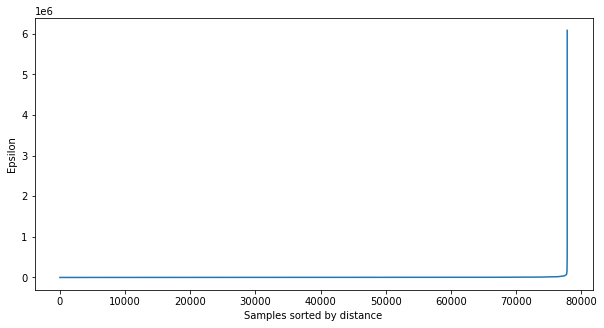

In [100]:
from sklearn.neighbors import NearestNeighbors

# Choose min_samples: should be chosen based on domain knowledge
min_samples = 5

# Define NearestNeighbors
nn = NearestNeighbors(n_neighbors=min_samples)

# Fit the NearestNeighbors model
nn_model = nn.fit(df_artists_tracks[metric_features])

# Find the k-neighbors of each point in the dataset
distances, _ = nn_model.kneighbors(df_artists_tracks[metric_features])

# Sort the distances and take the largest one for each point
distances = np.sort(distances, axis=0)
distances = distances[:, -1]

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(distances)
plt.xlabel("Samples sorted by distance")
plt.ylabel("Epsilon")
plt.show()

In [75]:
# List of metric features
metric_features = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 
                   'loudness', 'mode', 'popularity', 'speechiness', 'tempo', 'time_signature', 'valence', 
                   'artist_popularity', 'followers']

# Fit and transform the data
metric_labels = metric_pipeline.fit_predict(df_artists_tracks[metric_features])

In [76]:
from sklearn.preprocessing import MultiLabelBinarizer

# Initialize the MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Fit and transform the genres
genres_binarized = mlb.fit_transform(df_artists_tracks['genres'])

# Convert the binarized genres to a DataFrame
genres_df = pd.DataFrame(genres_binarized, columns=mlb.classes_)

# Add the genres to the main dataframe
df_artists_tracks = pd.concat([df_artists_tracks.drop('genres', axis=1), genres_df], axis=1)



In [77]:
from sklearn.cluster import KMeans

# Define the number of clusters
n_clusters = 10  # Change this based on your needs

# Define a pipeline for genre features
genre_pipeline = Pipeline(steps=[
    ('kmeans', KMeans(n_clusters=n_clusters))
])

# Fit the data
genre_labels = genre_pipeline.fit_predict(genres_df)


In [78]:
df_artists_tracks['genre_cluster'] = genre_labels
df_artists_tracks['metric_cluster'] = metric_labels


In [79]:
# Define your metric features
metric_features = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 
                   'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 
                   'tempo', 'time_signature', 'valence', 'artist_popularity', 'followers',
                   'genre_cluster', 'metric_cluster']

# Fit the NearestNeighbors model
knn = NearestNeighbors(n_neighbors=10)  # Change n_neighbors based on your needs
knn.fit(df_artists_tracks[metric_features])

# Write a function that uses the model to recommend songs
def recommend_songs_knn2(song_id, df, n_recommendations):
    song_features = df[df['tracks_id'] == song_id][metric_features]
    
    distances, indices = knn.kneighbors(song_features)
    
    song_list = []
    for i in range(len(distances.flatten())):
        if i == 0:
            print(f'Recommendations for {song_id}:\n')
        else:
            song_list.append(df.iloc[indices.flatten()[i]]['tracks_id'])
            print(f'{i}: {df.iloc[indices.flatten()[i]]["tracks_id"]}, with distance of {distances.flatten()[i]}')

    return song_list


In [86]:
def recommend_songs_knn(song_id, df, n_recommendations):
    # Get the genre_cluster and metric_cluster of the song
    song_clusters = df.loc[df['tracks_id'] == song_id, ['genre_cluster', 'metric_cluster']]
    genre_cluster = song_clusters['genre_cluster'].values[0]
    metric_cluster = song_clusters['metric_cluster'].values[0]

    # Get all songs within the same genre and metric clusters
    same_clusters = df[(df['genre_cluster'] == genre_cluster) & (df['metric_cluster'] == metric_cluster)]
    if len(same_clusters) >= n_recommendations:
        # If enough songs, compute KNN within the same genre and metric clusters
        song_features = same_clusters[same_clusters['tracks_id'] == song_id][metric_features]
        knn = NearestNeighbors(n_neighbors=n_recommendations)
        knn.fit(same_clusters[metric_features])
        distances, indices = knn.kneighbors(song_features)
    else:
        # Otherwise, get all songs within the same genre or metric cluster
        same_clusters = df[(df['genre_cluster'] == genre_cluster) | (df['metric_cluster'] == metric_cluster)]
        if len(same_clusters) >= n_recommendations:
            # If enough songs, compute KNN within the same genre or metric clusters
            song_features = same_clusters[same_clusters['tracks_id'] == song_id][metric_features]
            knn = NearestNeighbors(n_neighbors=n_recommendations)
            knn.fit(same_clusters[metric_features])
            distances, indices = knn.kneighbors(song_features)
        else:
            # If still not enough songs, compute KNN across all songs
            song_features = df[df['tracks_id'] == song_id][metric_features]
            knn = NearestNeighbors(n_neighbors=n_recommendations)
            knn.fit(df[metric_features])
            distances, indices = knn.kneighbors(song_features)

    # Print and return the recommendations
    song_list = []
    for i in range(len(distances.flatten())):
        if i == 0:
            print(f'Recommendations for {song_id}:\n')
        else:
            song_list.append(df.iloc[indices.flatten()[i]]['tracks_id'])
            print(f'{i}: {df.iloc[indices.flatten()[i]]["tracks_id"]}, with distance of {distances.flatten()[i]}')

    return song_list


In [99]:
song_features = df_artists_tracks_orig[df_artists_tracks_orig['tracks_id'] == '5qljLQuKnNJf4F4vfxQB0V']
song_features   

#show 3SM258JjFcDleOHRC4xSG8, 23sSN73Ki9t3dz7RMJcimx, 2U1EeEkueimapc1RXOmmzP, 4ySkQDs1dYGvSmbhX1fwvv, 6p7wL9H4f4eKkdma5oZcej in df_artists_tracks_orig
list = recommend_songs_knn('5qljLQuKnNJf4F4vfxQB0V', df_artists_tracks, 10)
df_artists_tracks_orig[df_artists_tracks_orig['tracks_id'].isin(list)]


Recommendations for 5qljLQuKnNJf4F4vfxQB0V:

1: 6ileHaSaGI8UjUK1jQu6jm, with distance of 300.2944593204876
2: 3Ee7yQ1JmAkSOzCxn7ZVj7, with distance of 407.7842679478832
3: 6h8E7Zi73yyFx6wAN0q85b, with distance of 472.25629201547497
4: 2nwqu5nbKy4P4w117435zj, with distance of 617.1705451278249
5: 56AecW9Anb0CY6HpgWvcg9, with distance of 743.9271156184294
6: 0oakHTPj4SF7Si0NAsLwi8, with distance of 831.4220272443381
7: 0p9zxloVaytLMbORCBMfwO, with distance of 952.7787443903353
8: 433JymbpWnRMHXzp1oTRP7, with distance of 1302.4897773590458
9: 6kSMUoQA3VSMWOk2ni0hfD, with distance of 1366.604776130748


,Unnamed: 0_x,acousticness,album_id,analysis_url,artists_id,available_markets,country,danceability,disc_number,duration_ms,...,type_x,Unnamed: 0_y,artist_popularity,followers,genres,id,name_y,track_id,track_name_prev_y,type_y
13,7,0.71900,4tKijjmxGClg4JOLAyo2qE,https://api.spotify.com/v1/audio-analysis/6ile...,3hYaK5FF3YAglCj5HZgBnP,['GB'],BE,0.513,1.0,591160.0,...,track,51,41,14288,"['british comedy', 'comedy']",3hYaK5FF3YAglCj5HZgBnP,Jimmy Carr,0xZwriIAl9tEmACBOzEOk0,track_1,artist
22,23244,0.76200,4tKijjmxGClg4JOLAyo2qE,https://api.spotify.com/v1/audio-analysis/3Ee7...,3hYaK5FF3YAglCj5HZgBnP,['GB'],BE,0.507,1.0,501640.0,...,track,51,41,14288,"['british comedy', 'comedy']",3hYaK5FF3YAglCj5HZgBnP,Jimmy Carr,0xZwriIAl9tEmACBOzEOk0,track_1,artist
179,20607,0.86500,3GHWsz3GsHXxqOpnJN4Zv9,https://api.spotify.com/v1/audio-analysis/2nwq...,7ubX7CBZbkPM3O1m2WBBd8,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.445,1.0,331093.0,...,track,26499,38,16398,"['british comedy', 'comedy', 'comic']",7ubX7CBZbkPM3O1m2WBBd8,Billy Connolly,2adHZTlefXdwA9nYV3yuaL,track_7,artist
260,67531,0.50800,1RiseYCaSyaBEHtiDI768E,https://api.spotify.com/v1/audio-analysis/6h8E...,7tP8iG479D2GhVmZ8jKjSk,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",AR,0.629,1.0,1665706.0,...,track,34750,25,1046,['drama'],7tP8iG479D2GhVmZ8jKjSk,Bart Wolffe,2e9SycthzzC1FQCEngmlz0,track_2,artist
323,34827,0.47500,2CbLBSlkvh2vR4JRLDRQso,https://api.spotify.com/v1/audio-analysis/56Ae...,6DoH7ywD5BcQvjloe9OcIj,"['AD', 'AE', 'AR', 'AU', 'BG', 'BH', 'BO', 'BR...",FI,0.614,1.0,280227.0,...,track,54974,68,637499,"['acoustic pop', 'folk-pop', 'indie folk', 'ne...",6DoH7ywD5BcQvjloe9OcIj,Ray LaMontagne,1fYouLdK3PkOMPnx4CPxTY,track_23,artist
359,47576,0.18600,7EJ5pXrSqqfybKyfbvlz84,https://api.spotify.com/v1/audio-analysis/0oak...,09xj0S68Y1OU1vHMCZAIvz,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",AR,0.615,1.0,135133.0,...,track,52168,72,1502839,"['latin', 'latin alternative', 'latin rock', '...",09xj0S68Y1OU1vHMCZAIvz,Café Tacvba,19ScoKGqnfUggyqOVQjsoH,track_3,artist
453,86217,0.57400,2OVkLEMcPk9LPdl4eza40X,https://api.spotify.com/v1/audio-analysis/0p9z...,1EXjXQpDx2pROygh8zvHs4,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",AR,0.543,1.0,246677.0,...,track,54859,74,1583293,"['latin pop', 'spanish pop', 'spanish pop rock']",1EXjXQpDx2pROygh8zvHs4,Melendi,0p9zxloVaytLMbORCBMfwO,track_46,artist
764,170,0.37100,6ReDl0QX2YZdK4aYh5yOOg,https://api.spotify.com/v1/audio-analysis/6kSM...,1bYTiIHnxEdBncCHYCfE4j,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.309,1.0,210686.0,...,track,48129,42,3581,['irish singer-songwriter'],1bYTiIHnxEdBncCHYCfE4j,Lilla Vargen,4Y5pc5mwRV2rEGhhHZZhCk,track_22,artist
846,25462,0.00632,5ppnlEoj4HdRRdRihnY3jU,https://api.spotify.com/v1/audio-analysis/433J...,0EmeFodog0BfCgMzAIvKQp,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.617,1.0,257027.0,...,track,51744,84,15675167,"['colombian pop', 'dance pop', 'latin', 'latin...",0EmeFodog0BfCgMzAIvKQp,Shakira,4I4IWwxmrY8CUQ0lJAT3fW,track_19,artist


In [82]:
recommend_songs_knn('5qljLQuKnNJf4F4vfxQB0V', df_artists_tracks, 10)
recommend_songs_knn2('5qljLQuKnNJf4F4vfxQB0V', df_artists_tracks, 10)

Using same clusters
Recommendations for 5qljLQuKnNJf4F4vfxQB0V:

1: 6ileHaSaGI8UjUK1jQu6jm, with distance of 300.2944593204876
2: 3Ee7yQ1JmAkSOzCxn7ZVj7, with distance of 407.7842679478832
3: 6h8E7Zi73yyFx6wAN0q85b, with distance of 472.25629201547497
4: 2nwqu5nbKy4P4w117435zj, with distance of 617.1705451278249
5: 56AecW9Anb0CY6HpgWvcg9, with distance of 743.9271156184294
6: 0oakHTPj4SF7Si0NAsLwi8, with distance of 831.4220272443381
7: 0p9zxloVaytLMbORCBMfwO, with distance of 952.7787443903353
8: 433JymbpWnRMHXzp1oTRP7, with distance of 1302.4897773590458
9: 6kSMUoQA3VSMWOk2ni0hfD, with distance of 1366.604776130748
Recommendations for 5qljLQuKnNJf4F4vfxQB0V:

1: 3cPdD7SWz3wGZ5xENiuoFK, with distance of 55.556977588679736
2: 6vnSPnsRNJAjMxCoe1HyR4, with distance of 75.5315111603205
3: 4lucCq75lCBqcDvCvNHX3X, with distance of 99.52788352363295
4: 19CVyKUj6sc0O7DL8YNLJH, with distance of 171.90180654769267
5: 48MD8OcaGsbRpPNrWOJPFK, with distance of 177.19222080730302
6: 6FugyKqhP4hZKof

['3cPdD7SWz3wGZ5xENiuoFK',
 '6vnSPnsRNJAjMxCoe1HyR4',
 '4lucCq75lCBqcDvCvNHX3X',
 '19CVyKUj6sc0O7DL8YNLJH',
 '48MD8OcaGsbRpPNrWOJPFK',
 '6FugyKqhP4hZKofxRHoOV1',
 '6WgmGxSHdto6AG1qRUSMrt',
 '7zqGeByPHWYqdmzQtJShWW',
 '1RHTGr4X3c6eiTjvf1iz7B']

In [9]:
#import recommmeder.py
# recommender
# update the import statement
import recommender as recommender
import importlib
importlib.reload(recommender)

#call read_data function
recommender.init_file()
#get global variables from recommender.py
df_artists_tracks = recommender.df_artists_tracks
#df_artists_tracks_orig = recommender.df_artists_tracks_orig
df_artists_tracks.head()
#call recommend_songs_knn function


/Users/merve/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Unnamed: 0_x,acousticness,album_id,analysis_url,artists_id,available_markets,country,danceability,disc_number,duration_ms,...,r,s,t,u,v,w,x,y,z,genre_cluster
0,0,0.294,0D3QufeCudpQANOR7luqdr,https://api.spotify.com/v1/audio-analysis/5qlj...,3mxJuHRn2ZWD5OofvJtDZY,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.698,1.0,235584.0,...,0,1,0,0,0,0,0,0,0,7
1,84077,0.166,3wIjGVauUxR4c3NvnQZ0Jo,https://api.spotify.com/v1/audio-analysis/3THT...,3mxJuHRn2ZWD5OofvJtDZY,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",AR,0.543,1.0,233998.0,...,0,1,0,0,0,0,0,0,0,7
2,1,0.863,1bcqsH5UyTBzmh9YizdsBE,https://api.spotify.com/v1/audio-analysis/3VAX...,4xWMewm6CYMstu0sPgd9jJ,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.719,1.0,656960.0,...,0,0,0,0,0,0,0,0,0,1
3,6,0.824,51g5viCaYjOW5XO4qX1RCD,https://api.spotify.com/v1/audio-analysis/1WJz...,4xWMewm6CYMstu0sPgd9jJ,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.688,1.0,29240.0,...,0,0,0,0,0,0,0,0,0,1
4,41,0.850,7EtGJVYZbb2Krgwizn2flB,https://api.spotify.com/v1/audio-analysis/65Mo...,4xWMewm6CYMstu0sPgd9jJ,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.632,1.0,497493.0,...,0,0,0,0,0,0,0,0,0,1


In [10]:
recommender.recommend_songs('5qljLQuKnNJf4F4vfxQB0V', 10)

Recommendations for 5qljLQuKnNJf4F4vfxQB0V:

1: 0EYOdF5FCkgOJJla8DI2Md, with distance of 242.95587470281987
2: 3k64ZLozksTCtXL4JtD80L, with distance of 727.9009999776292
3: 4jYg3ywhIcm9AZ6SS7tR9Q, with distance of 831.4220272443381
4: 1qGmxIGEuBEkj7bft72Kh0, with distance of 946.19914379448
5: 5szJ8SMwQVEvvdk65w6M6g, with distance of 1264.1426274041823
6: 4dHNWm43HrElSRtwvRRbtg, with distance of 1302.4897773590458
7: 1dp62fHaXUP0Zh45voegpI, with distance of 1366.8582674178836
8: 2LU2TJWg06mNOXAUcDb4DE, with distance of 1412.393788861036
9: 3THTkAwJOsmxgizvYkBNRI, with distance of 1586.2209945443683


,Unnamed: 0_x,acousticness,album_id,analysis_url,artists_id,available_markets,country,danceability,disc_number,duration_ms,...,type_x,Unnamed: 0_y,artist_popularity,followers,genres,id,name,track_id,track_name_prev_y,type_y
1,84077,0.16600,3wIjGVauUxR4c3NvnQZ0Jo,https://api.spotify.com/v1/audio-analysis/3THT...,3mxJuHRn2ZWD5OofvJtDZY,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",AR,0.543,1.0,233998.0,...,track,45499,28,425,['finnish indie'],3mxJuHRn2ZWD5OofvJtDZY,Jesse Markin,3THTkAwJOsmxgizvYkBNRI,track_19,artist
266,71825,0.33300,4lRCoP1w4VyHFLedNkBW44,https://api.spotify.com/v1/audio-analysis/4jYg...,7tP8iG479D2GhVmZ8jKjSk,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",AR,0.618,1.0,1288283.0,...,track,34750,25,1046,['drama'],7tP8iG479D2GhVmZ8jKjSk,Bart Wolffe,2e9SycthzzC1FQCEngmlz0,track_2,artist
355,31865,0.14500,0fO8mzViUoz12iCHrPppE9,https://api.spotify.com/v1/audio-analysis/3k64...,09xj0S68Y1OU1vHMCZAIvz,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",FI,0.539,1.0,414333.0,...,track,52168,72,1502839,"['latin', 'latin alternative', 'latin rock', '...",09xj0S68Y1OU1vHMCZAIvz,Café Tacvba,19ScoKGqnfUggyqOVQjsoH,track_3,artist
393,46770,0.39800,7grisfn3eLVmGcSKYWujqT,https://api.spotify.com/v1/audio-analysis/2LU2...,6pSsE5y0uJMwYj83KrPyf9,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",FI,0.525,1.0,202115.0,...,track,20590,46,51758,"['alternative r&b', 'deep pop r&b', 'escape ro...",6pSsE5y0uJMwYj83KrPyf9,Dawn Richard,6ZFPfm1FQHoGekM7ywe10r,track_67,artist
449,16656,0.23800,1J83k6qJHhtXaexpnJzoqr,https://api.spotify.com/v1/audio-analysis/1dp6...,1EXjXQpDx2pROygh8zvHs4,"['AR', 'AU', 'BE', 'BO', 'BR', 'CH', 'CL', 'CO...",BE,0.641,1.0,229309.0,...,track,54859,74,1583293,"['latin pop', 'spanish pop', 'spanish pop rock']",1EXjXQpDx2pROygh8zvHs4,Melendi,0p9zxloVaytLMbORCBMfwO,track_46,artist
516,88835,0.17600,5Xv8PCJ7ZMmRd3jXnJqg3V,https://api.spotify.com/v1/audio-analysis/5szJ...,30U8fYtiNpeA5KH6H87QUV,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",AR,0.317,1.0,207040.0,...,track,41397,57,363211,"['alternative rock', 'garage rock', 'hardcore ...",30U8fYtiNpeA5KH6H87QUV,Dead Kennedys,5szJ8SMwQVEvvdk65w6M6g,track_17,artist
578,66657,0.00220,3sSfjX4fhZonjyZ10x0l0f,https://api.spotify.com/v1/audio-analysis/1qGm...,5eAWCfyUhZtHHtBdNk56l1,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",AR,0.263,1.0,151733.0,...,track,51731,79,4774393,"['alternative metal', 'nu metal', 'post-grunge...",5eAWCfyUhZtHHtBdNk56l1,System Of A Down,7kwiwQhWRBSP1PJv4ZFJUK,track_9,artist
580,69799,0.00662,0cn6MHyx4YuZauaB7Pb66o,https://api.spotify.com/v1/audio-analysis/0EYO...,5eAWCfyUhZtHHtBdNk56l1,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",AR,0.556,1.0,255467.0,...,track,51731,79,4774393,"['alternative metal', 'nu metal', 'post-grunge...",5eAWCfyUhZtHHtBdNk56l1,System Of A Down,7kwiwQhWRBSP1PJv4ZFJUK,track_9,artist
641,136,0.00708,1H84oHDW2NjJlZMBAZsjtT,https://api.spotify.com/v1/audio-analysis/4dHN...,1B0155rdv175D1tQ8VH7Oy,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.630,1.0,164751.0,...,track,48098,59,56726,[],1B0155rdv175D1tQ8VH7Oy,FEVER 333,51rdCmgHBzg9HJ7eHjVRK9,track_17,artist
